# Fastai Tabular Data Example

In [3]:
import fastai
from fastai.tabular import *
import pandas as pd
from fastai.gen_doc.nbdoc import *

Load Data

In [4]:
path = Path('')
df = pd.read_csv('dataset/markah.csv')

In [5]:
path

PosixPath('.')

In [6]:
df

,MARKAH,STATUS
0,68,LULUS
1,91,LULUS
2,81,LULUS
3,54,LULUS
4,72,LULUS
...,...,...
994,40,GAGAL
995,35,GAGAL
996,36,GAGAL
997,36,GAGAL


Preprocessing data

In [7]:

dep_var ='STATUS'
cont_names =['MARKAH']
#bukan_nombor = ['STATUS']

#replace missing values for continuous variables by the median column value and normalize those

procs = [FillMissing, Categorify, Normalize]


In [8]:
#Untuk split data kepada training dan validation

valid_idx = range(len(df)-200,len(df))

In [9]:
test = TabularList.from_df(df,cont_names=cont_names)

In [10]:
data = TabularDataBunch.from_df(path,df, dep_var= dep_var, valid_idx=valid_idx, procs=procs)

In [11]:
print(data.train_ds.cont_names)

['MARKAH']


Define Model

In [12]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [13]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.176383,0.129226,1.000000,00:01
1,0.104518,0.024544,1.000000,00:01
2,0.075593,0.010475,1.000000,00:01
3,0.062260,0.001809,1.000000,00:01
4,0.071183,0.005189,1.000000,00:01
5,0.059027,0.006091,1.000000,00:01
6,0.052551,0.008802,1.000000,00:01
7,0.045493,0.016177,1.000000,00:01
8,0.042044,0.014733,1.000000,00:01
9,0.038435,0.012003,1.000000,00:01


Prediction

In [14]:
#predict result dari test data 

learn.predict(df.iloc[0])


(Category LULUS, tensor(1), tensor([2.1827e-04, 9.9978e-01]))

In [15]:
learn.predict(df.iloc[700])

(Category GAGAL, tensor(0), tensor([1.0000e+00, 4.8131e-07]))

In [16]:
test= pd.read_csv('dataset/test_markah.csv')

In [17]:
test

,MARKAH,STATUS
0,100,GAGAL
1,99,LULUS
2,88,LULUS
3,77,LULUS
4,66,LULUS
5,55,LULUS
6,44,GAGAL
7,33,GAGAL
8,41,GAGAL
9,42,GAGAL


In [18]:
#predict result dari test set

learn.predict(test.iloc[1])

(Category LULUS, tensor(1), tensor([9.8359e-04, 9.9902e-01]))

In [19]:
learn.predict(test.iloc[11])

(Category GAGAL, tensor(0), tensor([0.8804, 0.1196]))

Visualization

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

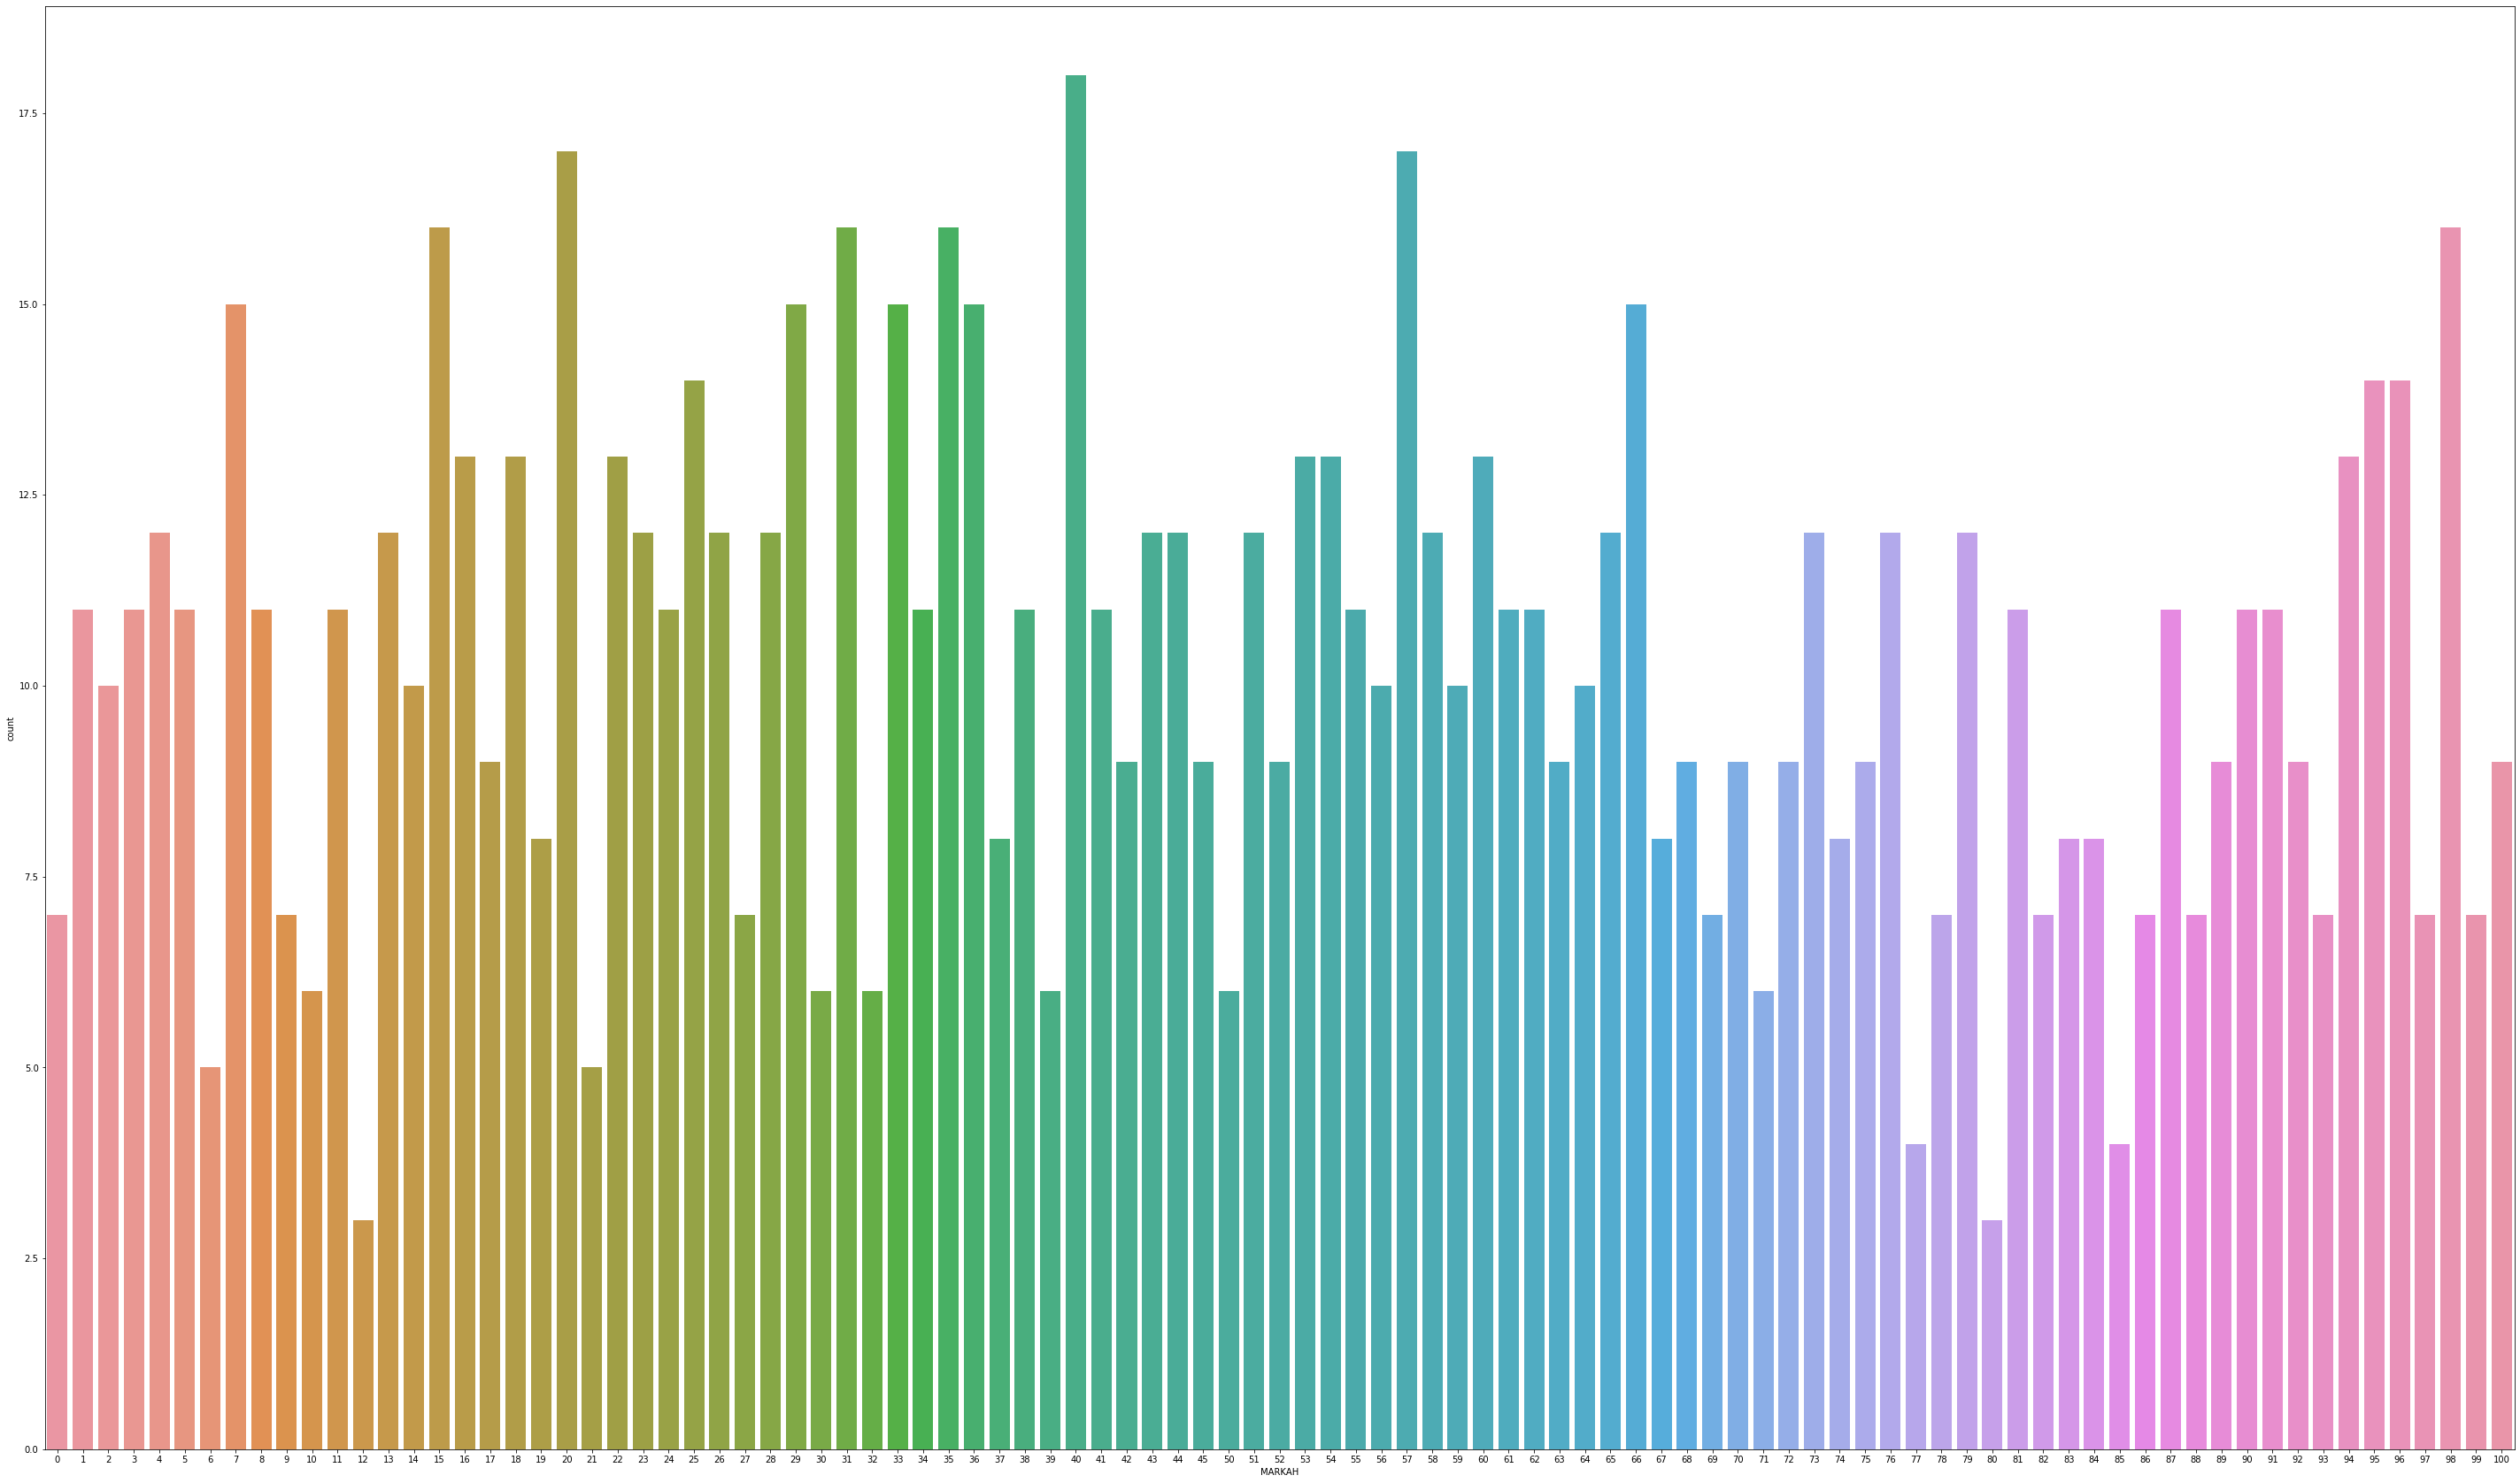

In [22]:
plt.figure(figsize=(50,30))

sns.countplot(x='MARKAH', data=df)


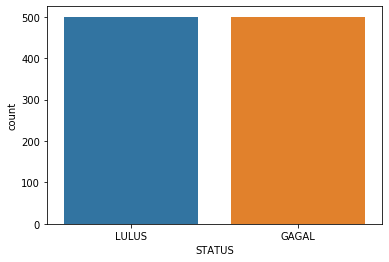

In [23]:
sns.countplot(x='STATUS', data=df)